<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_Python_new/blob/master/Regressione_Lineare_Semplice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive in Runtime Machine**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive




---



---


**Install Libraries**

In [0]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe



---
---


**Import Libraries**

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

#Python API for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gs=gspread.authorize(GoogleCredentials.get_application_default())



---
---
**Load GoogleSheet data into a dataFrame and plot them**

{'boxes': [<matplotlib.lines.Line2D at 0x7fe12bc3dac8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe12bbe1668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe12bbed0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe12bbe1cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe12bc3df28>,
  <matplotlib.lines.Line2D at 0x7fe12bbe12e8>]}

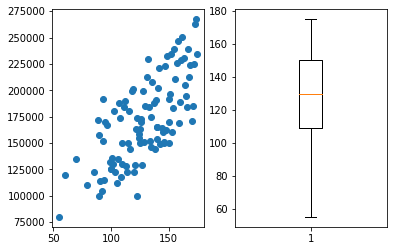

In [7]:
FILE_NAME='Regressione_IN'
wks=gs.open(FILE_NAME).sheet1
INPUT_df=get_as_dataframe(wks)

#remove all NaN
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')

#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0]
np_IN_Y=np_IN[:,1]

#plot data
fig, axs = plt.subplots(1,2)
axs[0].scatter(np_IN_X, np_IN_Y)
axs[1].boxplot(np_IN_X)




---

---

Machine Learning
**ALGORITMO DI REGRESSIONE LINEARE**



TEST
R^2= 0.44254888488687694 
MSE= 863417654.410937 

TRAIN
R^2= 0.529110977217653 
MSE= 772009886.994511 



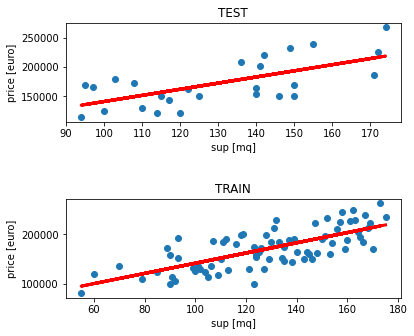

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_Y,test_size=0.25)

#reshape features to be used with LinearRegression's methods
X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))

#train the linear regressor
reg = LinearRegression().fit(X_train_r, y_train)

#y_pred is a linear prediction of X_test
y_pred_test=reg.predict(X_test_r)
y_pred_train=reg.predict(X_train_r)

#evaluate the model by using R=1-RSE and MSE
R2=reg.score(X_test_r,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=reg.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

#show the solution
fig, axs = plt.subplots(2,1)

pos0=axs[0].get_position()
pos0_new=[pos0.x0,pos0.y0+0.2,pos0.width,pos0.height]
axs[0].set_position(pos0_new)
axs[0].set_xlabel('sup [mq]')
axs[0].set_ylabel('price [euro]')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].plot(X_test,y_pred_test,c='red',linewidth=3)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup [mq]')
axs[1].set_ylabel('price [euro]')
axs[1].scatter(X_train,y_train)
axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)